In [35]:
from core.context_exposure import index_celltypes,specific_ids
from core.database  import context_map
from mylab.Functions import *
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
from core.context_exposure import mouseid_part_day_aim

## demo

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s


Text(0.5, 1.0, '2020061')

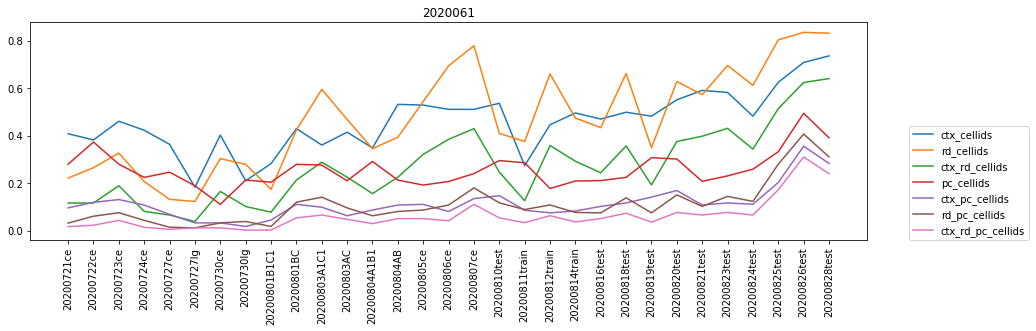

In [102]:
celltype_files = index_celltypes(mouse_id="2020061")
celltype_files

days = []
aims = []
wenn_lists_aves=[]
contextcell_ids=[]
rdcell_ids=[]
pccell_ids=[]
wenn_lists=[]
for celltype_file in celltype_files:
    mouseid,part,day,aim= mouseid_part_day_aim(celltype_file)
    days.append(day)
    aims.append(aim)

    try:
        contextcell_id, rdcell_id,pccell_id,total_cell_num = specific_ids(celltype_file,contexts=[0,1])
        contextcell_ids= list(set(contextcell_id["ctx0cells"]+contextcell_id["ctx1cells"]))
        rdcell_ids = list(set(rdcell_id["context0_leftcells"]+ rdcell_id["context0_rightcells"]+ rdcell_id["context1_leftcells"]+ rdcell_id["context1_rightcells"]))
        pccell_ids = list(set(pccell_id["context0_pccells"] + pccell_id["context1_pccells"]))
    except:
        contextcell_id, rdcell_id,pccell_id,total_cell_num = specific_ids(celltype_file,contexts=[1,2])
        contextcell_ids= list(set(contextcell_id["ctx1cells"]+contextcell_id["ctx2cells"]))
        rdcell_ids = list(set(rdcell_id["context1_leftcells"]+ rdcell_id["context1_rightcells"]+ rdcell_id["context2_leftcells"]+ rdcell_id["context2_rightcells"]))
        pccell_ids = list(set(pccell_id["context1_pccells"] + pccell_id["context2_pccells"]))
        
        
    ctx_cellids = list(set(spread(contextcell_id.values())))
    rd_cellids = list(set(spread(rdcell_id.values())))
    ctx_rd_cellids = [i for i in ctx_cellids if i in rd_cellids]

    pc_cellids = list(set(spread(pccell_id.values())))        
    ctx_pc_cellids = [i for i in ctx_cellids if i in pc_cellids]
    rd_pc_cellids = [i for i in rd_cellids if i in pc_cellids]

    ctx_rd_pc_cellids = [i for i in ctx_rd_cellids if i in pc_cellids]

    wenn_list = [len(ctx_cellids)/total_cell_num
                 ,len(rd_cellids)/total_cell_num
                 ,len(ctx_rd_cellids)/total_cell_num
                 ,len(pc_cellids)/total_cell_num
                 ,len(ctx_pc_cellids)/total_cell_num
                 ,len(rd_pc_cellids)/total_cell_num
                 ,len(ctx_rd_pc_cellids)/total_cell_num]
    
    wenn_lists.append(wenn_list)
    wenn_list = [round(i,2) for i in wenn_list]
#     venn3(wenn_list)
#     plt.title("%s_%s_%s"%(part,day,aim))
#     plt.show()
# wenn_lists_ave = np.mean(wenn_lists,axis=0)
# wenn_lists_aves.append(wenn_lists_ave)
# wenn_lists_round2 = [round(i,2) for i in wenn_lists_ave]
# venn3(wenn_lists_round2)

wenn_lists = np.array(wenn_lists)
len(wenn_lists)

plt.figure(figsize=(15,4))
plt.plot(wenn_lists)
plt.legend(labels=["ctx_cellids","rd_cellids","ctx_rd_cellids","pc_cellids","ctx_pc_cellids","rd_pc_cellids","ctx_rd_pc_cellids"]
           ,bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
labels = [i+j for i,j in zip(days,aims)]
plt.xticks(ticks=np.arange(0,len(wenn_lists)),labels=labels,rotation=90)
plt.title("2020061")

## index celltypes of each mouse

In [98]:
def cell_proportion_matrix(celltype_files):
    days = []
    aims = []
    wenn_lists_aves=[]
    contextcell_ids=[]
    rdcell_ids=[]
    pccell_ids=[]
    wenn_lists=[]
    for celltype_file in celltype_files:
        mouseid,part,day,aim= mouseid_part_day_aim(celltype_file)
        days.append(day)
        aims.append(aim)

        try:
            contextcell_id, rdcell_id,pccell_id,total_cell_num = specific_ids(celltype_file,contexts=[0,1])
            contextcell_ids= list(set(contextcell_id["ctx0cells"]+contextcell_id["ctx1cells"]))
            rdcell_ids = list(set(rdcell_id["context0_leftcells"]+ rdcell_id["context0_rightcells"]+ rdcell_id["context1_leftcells"]+ rdcell_id["context1_rightcells"]))
            pccell_ids = list(set(pccell_id["context0_pccells"] + pccell_id["context1_pccells"]))
        except:
            contextcell_id, rdcell_id,pccell_id,total_cell_num = specific_ids(celltype_file,contexts=[1,2])
            contextcell_ids= list(set(contextcell_id["ctx1cells"]+contextcell_id["ctx2cells"]))
            rdcell_ids = list(set(rdcell_id["context1_leftcells"]+ rdcell_id["context1_rightcells"]+ rdcell_id["context2_leftcells"]+ rdcell_id["context2_rightcells"]))
            pccell_ids = list(set(pccell_id["context1_pccells"] + pccell_id["context2_pccells"]))


        ctx_cellids = list(set(spread(contextcell_id.values())))
        rd_cellids = list(set(spread(rdcell_id.values())))
        ctx_rd_cellids = [i for i in ctx_cellids if i in rd_cellids]

        pc_cellids = list(set(spread(pccell_id.values())))        
        ctx_pc_cellids = [i for i in ctx_cellids if i in pc_cellids]
        rd_pc_cellids = [i for i in rd_cellids if i in pc_cellids]

        ctx_rd_pc_cellids = [i for i in ctx_rd_cellids if i in pc_cellids]

        wenn_list = [len(ctx_cellids)/total_cell_num
                     ,len(rd_cellids)/total_cell_num
                     ,len(ctx_rd_cellids)/total_cell_num
                     ,len(pc_cellids)/total_cell_num
                     ,len(ctx_pc_cellids)/total_cell_num
                     ,len(rd_pc_cellids)/total_cell_num
                     ,len(ctx_rd_pc_cellids)/total_cell_num]

        wenn_lists.append(wenn_list)
    return wenn_lists

In [99]:


cell_proportions={}
for mouseid in ["201033","201034","206534","206548","206550","206551","206553","2020061"]:
    celltype_files = index_celltypes(mouse_id=mouseid)
    cell_proportions[mouseid] = cell_proportion_matrix(celltype_files)

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells:

## plot

In [103]:
index_celltypes(mouse_id="2020061")

['\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part1_day20200721_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part1_day20200722_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part1_day20200723_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part1_day20200724_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part234_day20200727_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part234_day20200727_aim_lg.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part234_day20200730_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part234_day20200730_aim_lg.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part234_day20200801_aim_

### 